In [68]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
from pathlib import Path
import warnings
from skimage.feature import hog
import tqdm
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None
import seaborn as sns

In [2]:
train_file = 'fashion_mnist/fashion-mnist_train.csv'
test_file = 'fashion_mnist/fashion-mnist_test.csv'
trainX = pd.read_csv(Path(train_file),error_bad_lines=False)
testX = pd.read_csv(Path(test_file),error_bad_lines=False)

In [3]:
print("Train shape: ", str(trainX.shape))
trainX.head()

Train shape:  (60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [4]:
print("Test shape: ", str(testX.shape))
testX.head()

Test shape:  (10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [5]:
classes = {0: "T-shirt/Top",1: "Trouser",2: "Pullover",3: "Dress",4: "Coat", 5: "Sandal", 6: "Shirt",7: "Sneaker",8: "Bag",9: "Ankle Boot"}
for i in range(10):
    trainX.loc[trainX["label"] == i, "label"] = classes[i]

In [6]:
classes = {0: "T-shirt/Top",1: "Trouser",2: "Pullover",3: "Dress",4: "Coat", 5: "Sandal", 6: "Shirt",7: "Sneaker",8: "Bag",9: "Ankle Boot"}
for i in range(10):
    testX.loc[testX["label"] == i, "label"] = classes[i]

In [7]:
trainY = trainX['label']
testY = testX['label']
trainX = trainX.drop(columns='label')
testX = testX.drop(columns='label')

In [8]:
def imshow(image,label):
    plt.title(label)
    plt.imshow(image.reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')

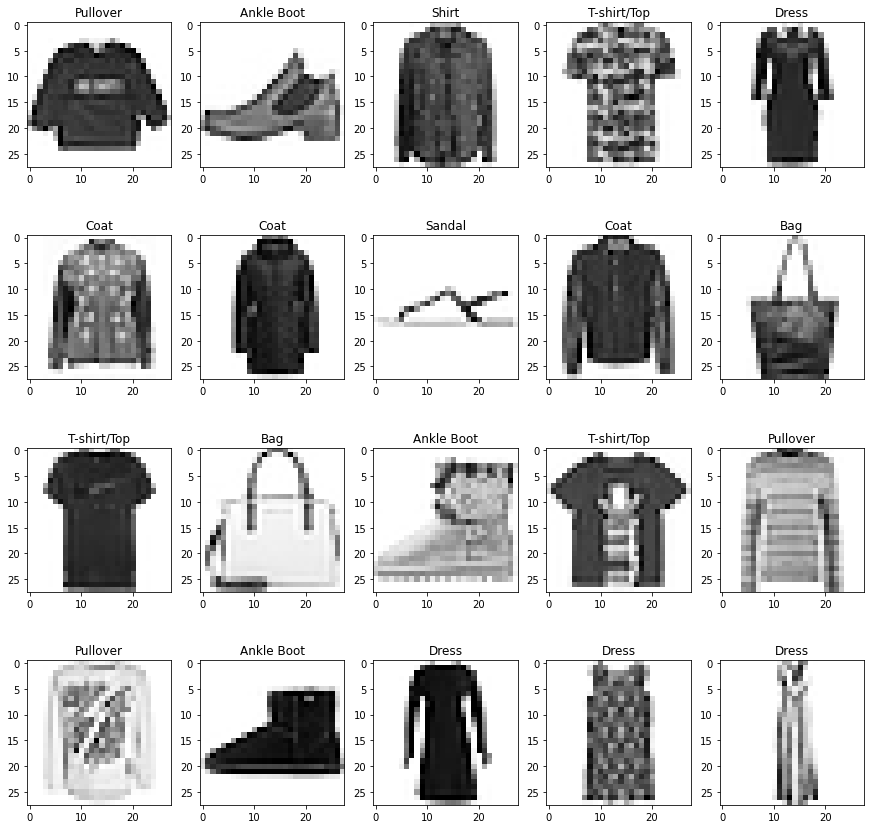

In [102]:
fig = plt.figure(figsize=(15,15))
column = 5
row = 4
for num in range(20):
    image,label = trainX.iloc[num].values.reshape((28,28)), trainY[num]
    fig.add_subplot(row, column, num+1)
    imshow(image,label)

In [10]:
trainX = np.divide(trainX, 255)
testX = np.divide(testX, 255)
mean_trainX = trainX.mean(axis=0)
mean_testX = testX.mean(axis=0)
trainX_nm = trainX - mean_trainX
testX_nm = testX - mean_testX

In [11]:
trainX_nm.iloc[0].shape

(784,)

In [12]:
classifier = svm.SVC(C=10,kernel='rbf',gamma="auto",probability = True)
classifier.fit(trainX_nm,trainY)

SVC(C=10, gamma='auto', probability=True)

In [13]:
predY = classifier.predict(testX_nm)

In [14]:
print(classification_report(testY,predY))

              precision    recall  f1-score   support

  Ankle Boot       0.94      0.95      0.94      1000
         Bag       0.96      0.97      0.96      1000
        Coat       0.81      0.85      0.83      1000
       Dress       0.87      0.91      0.89      1000
    Pullover       0.82      0.79      0.80      1000
      Sandal       0.96      0.94      0.95      1000
       Shirt       0.71      0.65      0.68      1000
     Sneaker       0.91      0.93      0.92      1000
 T-shirt/Top       0.82      0.84      0.83      1000
     Trouser       0.99      0.97      0.98      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



'Dress'

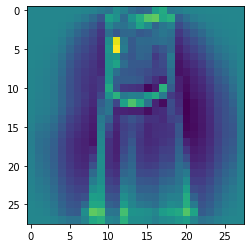

In [217]:
img = testX_nm.iloc[7777].values
plt.imshow(img.reshape(28,28))
classifier.predict(img.reshape(1,-1))
actual = classifier.predict(img.reshape(1,-1))[0]
actual

In [218]:
#img = testX_nm.iloc[5].values
#img = test_img.reshape(784)
img_copy = img.copy()
masked_pred = []
row = 0
while (row <= 672):
    #print("Row", row)
    img = img_copy
    col = 0
    while (col <= 24):
        #print("Col:", col)
        img[row +col +28*0 + 0] = 0
        img[row +col + 28*0 + 1] = 0
        img[row +col + 28*0 + 2] = 0
        img[row +col + 28*0 + 3] = 0
        img[row +col+ 28*1 + 0] = 0
        img[row +col+ 28*1 + 1] = 0
        img[row +col+ 28*1 + 2] = 0
        img[row +col+ 28*1 + 3] = 0
        img[row +col+ 28*2 + 0] = 0
        img[row +col+ 28*2 + 1] = 0
        img[row +col+ 28*2 + 2] = 0
        img[row +col+ 28*2 + 3] = 0
        img[row +col+ 28*3 + 0] = 0
        img[row +col+ 28*3 + 1] = 0
        img[row +col+ 28*3 + 2] = 0
        img[row +col+ 28*3 + 3] = 0
        masked_pred.append(classifier.predict(img.reshape(1,-1)))
        col += 4
    row += 112
#masked_pred

<AxesSubplot:>

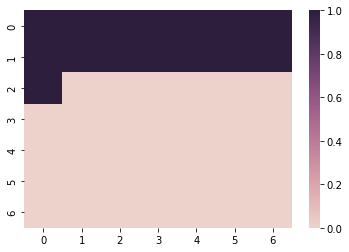

In [219]:
heatmap = []
for i in range(len(masked_pred)):
    if masked_pred[i][0] == actual:
        heatmap.append(1)
    else:
        heatmap.append(0)
heatmap = np.array(heatmap).reshape(7,7)
sns.heatmap(heatmap,cmap=sns.cubehelix_palette(as_cmap=True))

'Ankle Boot'

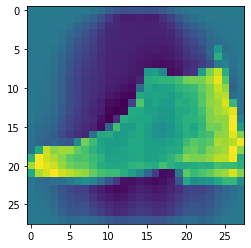

In [92]:
img = testX_nm.iloc[100].values
plt.imshow(img.reshape(28,28))
classifier.predict(img.reshape(1,-1))
actual = classifier.predict(img.reshape(1,-1))[0]
actual

In [93]:
img_copy = img.copy()
masked_pred = []
row = 0
while (row <= 672):
    #print("Row", row)
    img = img_copy
    col = 0
    while (col <= 24):
        #print("Col:", col)
        img[row +col +28*0 + 0] = 0
        img[row +col + 28*0 + 1] = 0
        img[row +col + 28*0 + 2] = 0
        img[row +col + 28*0 + 3] = 0
        img[row +col+ 28*1 + 0] = 0
        img[row +col+ 28*1 + 1] = 0
        img[row +col+ 28*1 + 2] = 0
        img[row +col+ 28*1 + 3] = 0
        img[row +col+ 28*2 + 0] = 0
        img[row +col+ 28*2 + 1] = 0
        img[row +col+ 28*2 + 2] = 0
        img[row +col+ 28*2 + 3] = 0
        img[row +col+ 28*3 + 0] = 0
        img[row +col+ 28*3 + 1] = 0
        img[row +col+ 28*3 + 2] = 0
        img[row +col+ 28*3 + 3] = 0
        masked_pred.append(classifier.predict(img.reshape(1,-1)))
        col += 4
    row += 112

<AxesSubplot:>

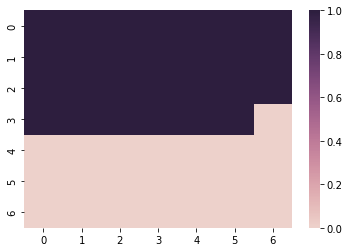

In [94]:
heatmap = []
for i in range(len(masked_pred)):
    if masked_pred[i][0] == actual:
        heatmap.append(1)
    else:
        heatmap.append(0)
heatmap = np.array(heatmap).reshape(7,7)
sns.heatmap(heatmap,cmap=sns.cubehelix_palette(as_cmap=True))

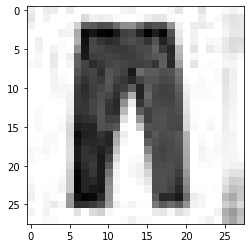

In [120]:
test_img = cv.imread('trouserimage5_28.jpeg',0) 
plt.imshow(test_img, cmap='gray')